3. Functional Requirements - Data Analysis and Visualization


Importing all the required Libraries

In [2]:
import sys
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as func
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType,VarcharType,TimestampType,StringType

Starting the spark session

In [3]:
spark = SparkSession.builder.appName("CreditCardSystemApp").master("local[*]").getOrCreate()

Functional
Requirements 3.1
Find and plot which transaction type has a high rate of
transactions.

Reading the data from database accrding to the query \
Counting all the transaction by TRANSACTION_TYPE

In [29]:
query='(select TRANSACTION_TYPE,count(*) as Count from cdw_sapp_credit_card  group by TRANSACTION_TYPE) as transaction_count'
data_table_transaction=spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable",query ) \
  .option("user", "root") \
  .option("password", "password")\
   .load()
data_table_transaction.show()

+----------------+-----+
|TRANSACTION_TYPE|Count|
+----------------+-----+
|         Grocery| 6549|
|           Bills| 6861|
|       Education| 6638|
|      Healthcare| 6723|
|   Entertainment| 6635|
|             Gas| 6605|
|            Test| 6683|
+----------------+-----+



Converting spark dataframe to pandas dataframe for visualisation

In [30]:
df_table_transaction_pd=data_table_transaction.toPandas()
df_table_transaction_pd


,TRANSACTION_TYPE,Count
0,Grocery,6549
1,Bills,6861
2,Education,6638
3,Healthcare,6723
4,Entertainment,6635
5,Gas,6605
6,Test,6683


In [28]:
df_table_transaction_pd

,TRANSACTION_TYPE,Count
0,Grocery,6549
1,Bills,6861
2,Education,6638
3,Healthcare,6723
4,Entertainment,6635
5,Gas,6605
6,Test,6683


In [36]:
df_table_transaction_pd=df_table_transaction_pd.sort_values('Count',ascending=False).reset_index()

In [37]:
df_table_transaction_pd

,index,TRANSACTION_TYPE,Count,colours
0,1,Bills,6861,#768493
1,3,Healthcare,6723,#768493
2,6,Test,6683,#768493
3,2,Education,6638,#768493
4,4,Entertainment,6635,#768493
5,5,Gas,6605,#768493
6,0,Grocery,6549,#d95f02


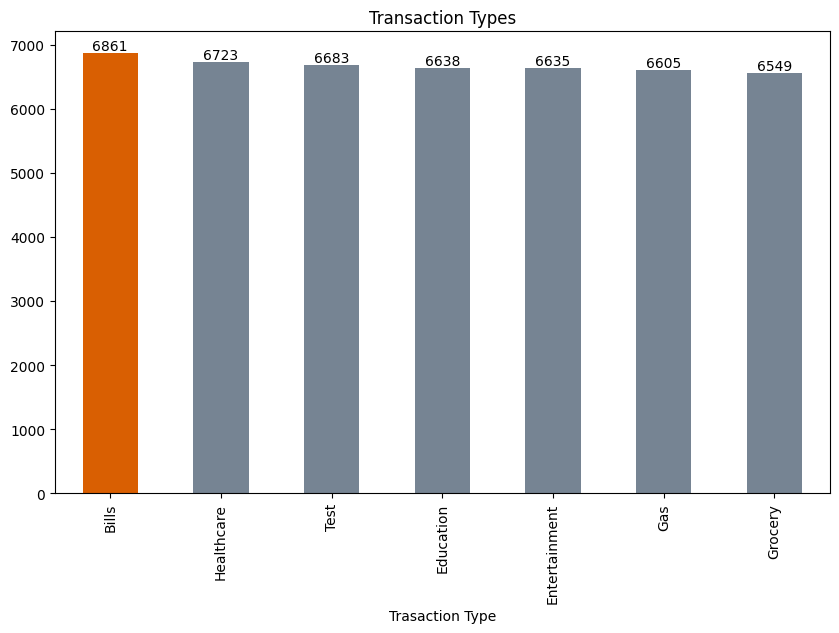

In [39]:

highlight_colour = '#d95f02'
non_highlight_colour = '#768493'

df_table_transaction_pd['colours'] = df_table_transaction_pd['Count'].apply(lambda x: highlight_colour if x == df_table_transaction_pd['Count'][0] else non_highlight_colour)
ax=df_table_transaction_pd.plot.bar(x='TRANSACTION_TYPE',y='Count',color=df_table_transaction_pd['colours'],figsize=(10,6))
plt.title("Transaction Types")
plt.xlabel("Trasaction Type")
plt.ylabel=("Transaction Count")
ax.bar_label(ax.containers[0],label_type='edge')
ax.get_legend().remove()
plt.show()

Functional
Requirements 3.2
Find and plot which state has a high number of customers.

query to count statewise customers and reading from the database according to the query

In [12]:
query='(select CUST_STATE,count(*) as Count from cdw_sapp_customer  group by CUST_STATE ORDER BY 2 DESC) as CUSTOMERSTATE_count'
data_table_customercount=spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable",query ) \
  .option("user", "root") \
  .option("password", "password")\
   .load()
data_table_customercount.show()

+----------+-----+
|CUST_STATE|Count|
+----------+-----+
|        NY|   96|
|        GA|   73|
|        PA|   72|
|        FL|   64|
|        IL|   58|
|        NJ|   53|
|        MD|   50|
|        CA|   46|
|        OH|   44|
|        MI|   44|
|        VA|   39|
|        NC|   37|
|        TX|   33|
|        MA|   33|
|        SC|   30|
|        WI|   29|
|        MN|   28|
|        MS|   23|
|        IA|   21|
|        KY|   17|
+----------+-----+
only showing top 20 rows



Converting to pandas datafrane for visualisation

In [13]:
df_table_customercount_pd=data_table_customercount.toPandas()
df_table_customercount_pd

,CUST_STATE,Count
0,NY,96
1,GA,73
2,PA,72
3,FL,64
4,IL,58
5,NJ,53
6,MD,50
7,CA,46
8,OH,44
9,MI,44


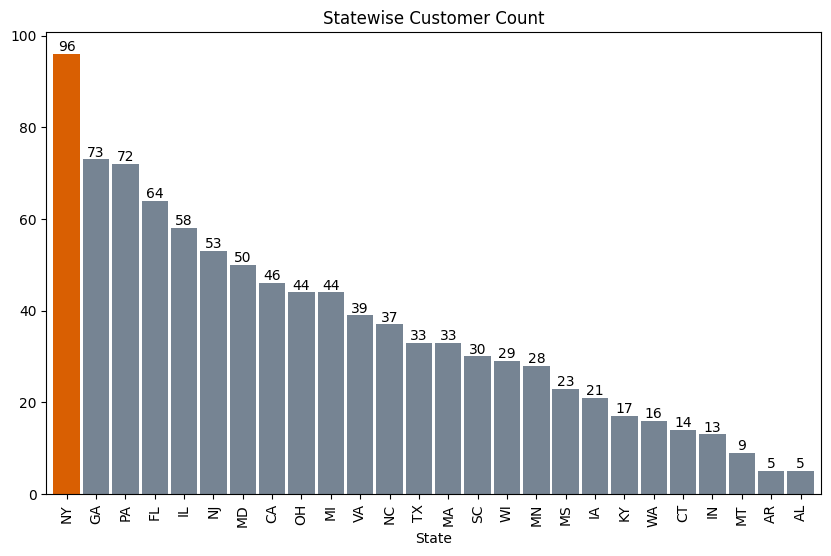

In [40]:
#colors=['green','y','y','y','y','y','y']
highlight_colour = '#d95f02'
non_highlight_colour = '#768493'

df_table_customercount_pd['colours'] = df_table_customercount_pd['Count'].apply(lambda x: highlight_colour if x == df_table_customercount_pd['Count'][0] else non_highlight_colour)
ax=df_table_customercount_pd.plot.bar(x='CUST_STATE',y='Count',color=df_table_customercount_pd['colours'] ,width=.9,figsize=(10,6))
plt.title("Statewise Customer Count")
plt.xlabel("State")
plt.ylabel=("Customer Count")
ax.get_legend().remove()
ax.bar_label(ax.containers[0],label_type='edge')
plt.show()

Functional
Requirements 3.3
Find and plot the sum of all transactions for the top 10 customers,
and which customer has the highest transaction amount.
Hint (use CUST_SSN).

query to join customers table and transaction table and groups the data by  customer ssn,firstname and lastname \
Then sorts the data descing order and reteives the first 10 rows to get the top 10 customers.

In [8]:

query='(select cust.First_Name ,cust.LAST_NAME ,CUST_SSN,sum(TRANSACTION_VALUE) AS Total from cdw_sapp_credit_card cr join cdw_sapp_customer cust \
on cr.CUST_SSN=cust.SSN group by CUST_SSN,1,2 order by 4 desc limit 10) as TOPCUSTOMER'
data_table_topcustomer=spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable",query ) \
  .option("user", "root") \
  .option("password", "password")\
   .load()
data_table_topcustomer.show()

+----------+----------+---------+------------------+
|First_Name| LAST_NAME| CUST_SSN|             Total|
+----------+----------+---------+------------------+
|        Ty|      Daly|123451125|5633.0700000000015|
|    Jessie|   Boucher|123452783| 5548.140000000001|
|    Phoebe|    Martin|123453486| 5476.079999999999|
|   Thurman|      Vera|123458668| 5314.970000000003|
|      Bret|   Perkins|123456678| 5261.030000000001|
|    Joesph|   Mcclain|123452026|           5241.18|
|   Aurelia|      Haas|123452518| 5223.959999999999|
|   Marcelo|   Emerson|123454933| 5203.080000000001|
|    Alexis|Villarreal|123457547|           5149.75|
| Christina|      Snow|123452085| 5133.290000000002|
+----------+----------+---------+------------------+



Converts the spark dataframe to pandas dataframe and joins first name and last name to get the fullname

In [9]:
df_table_topcustomer_pd=data_table_topcustomer.toPandas()
df_table_topcustomer_pd['Full Name']=df_table_topcustomer_pd['First_Name']+" "+df_table_topcustomer_pd['LAST_NAME']
df_table_topcustomer_pd.drop(['First_Name','LAST_NAME'],axis=1)

,CUST_SSN,Total,Full Name
0,123451125,5633.07,Ty Daly
1,123452783,5548.14,Jessie Boucher
2,123453486,5476.08,Phoebe Martin
3,123458668,5314.97,Thurman Vera
4,123456678,5261.03,Bret Perkins
5,123452026,5241.18,Joesph Mcclain
6,123452518,5223.96,Aurelia Haas
7,123454933,5203.08,Marcelo Emerson
8,123457547,5149.75,Alexis Villarreal
9,123452085,5133.29,Christina Snow


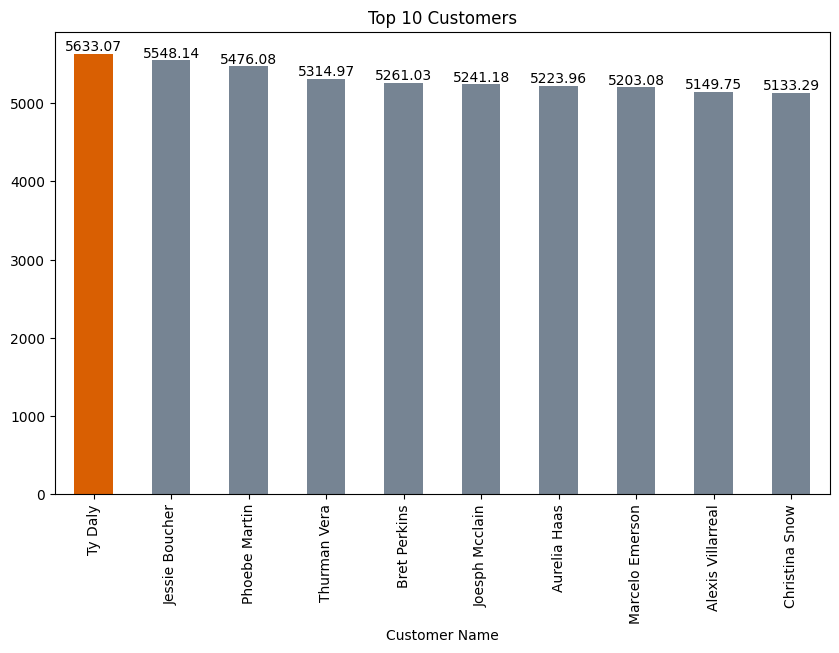

In [42]:

#colors=['green','y','y','y','y','y','y']
highlight_colour = '#d95f02'
non_highlight_colour = '#768493'

df_table_topcustomer_pd['colours'] = df_table_topcustomer_pd['Total'].apply(lambda x: highlight_colour if x == df_table_topcustomer_pd['Total'][0] else non_highlight_colour)
ax=df_table_topcustomer_pd.plot.bar(x='Full Name',y='Total',color=df_table_topcustomer_pd['colours'] ,figsize=(10,6))
plt.title("Top 10 Customers")
plt.xlabel("Customer Name")
plt.ylabel=("Total")
ax.bar_label(ax.containers[0],label_type='edge')
ax.get_legend().remove()
plt.show()